In [1]:
%matplotlib inline

import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs
from numba import njit
from glob import glob
from xhistogram.xarray import histogram
import julian
import datetime
import cftime

import warnings
warnings.filterwarnings('ignore')

In [2]:
run_dict = {

                'odiv210odiv230odiv306' : {
                             'color_identifier' : 'g',
                             'legend_label' : 'CM4X-p25 Control',
                             },
               'odiv209odiv313odiv437' :  {
                             'color_identifier' : 'b',
                             'legend_label' : 'CM4X-p125 Control',
                             },
                'odiv1' :   {
                             'legend_label' : "CM4.0 Control",
                             'color_identifier' : 'red',
                             },
             }

In [3]:
plt.rcParams.update({"font.size":12})
figsize=[6.5,4.0]
savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='jpeg')
degC= "$^{\circ}$C"


In [4]:
# Use the same font as JAMES
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

## Read netcdf data and plot Overturning figures:

mean of odiv1 = [17.896368]
Std of odiv1 = [1.0815033]
mean of odiv209odiv313odiv437 = [16.72306]
Std of odiv209odiv313odiv437 = [0.9843068]
mean of odiv210odiv230odiv306 = [16.996336]
Std of odiv210odiv230odiv306 = [0.96376294]


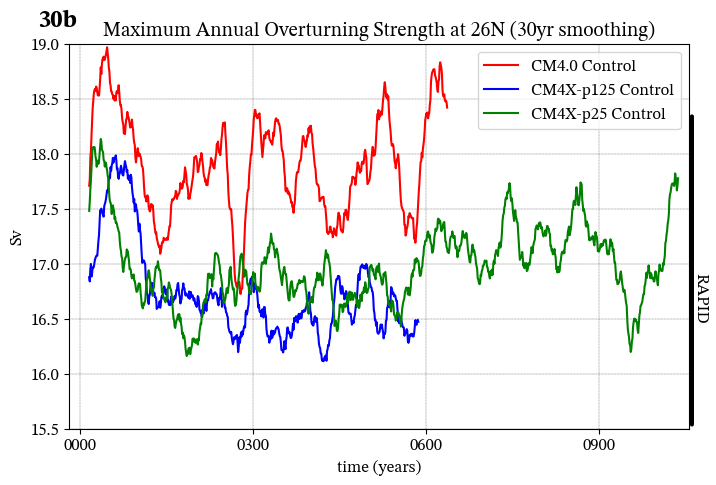

In [5]:
smoothing_level=30   #in years

control_runs=['odiv1','odiv209odiv313odiv437','odiv210odiv230odiv306']

min_AMOC_depth_constraint=500
obs_label_timedelta=10

fig = plt.figure(figsize=(8,5))
loopnum=0
start_dates=[]
end_dates=[]
for keys in control_runs:
    
    moc_z_resid=xr.open_dataset("/home/Bill.Hurlin/Matthew.Thomas/python_code/python_scripts/CM4hires_figures/AMOC_RAPID_data/"+"moc_z_resid_"+keys+".nc")
    moc_z_resid_ts=(moc_z_resid.vmo.where(moc_z_resid.z_l>min_AMOC_depth_constraint).max(dim='z_l')/1035/1e6)

    moc_z_resid_ts.rolling(time=smoothing_level,center=True).mean().plot(label=run_dict[keys]['legend_label'],color=run_dict[keys]['color_identifier'])
    plt.ylim(15.5,19.)
    plt.grid(color='black', linestyle='--', linewidth=.2)
    start_dates.append(moc_z_resid.time.values[0])
    end_dates.append(moc_z_resid.time.values[-1])
    
    print("mean of "+keys+" =",moc_z_resid_ts.mean('time').values)
    print("Std of "+keys+" =",moc_z_resid_ts.std('time').values)
    loopnum+=1

RAPID_transports_annual=xr.open_dataset("/home/Bill.Hurlin/Matthew.Thomas/python_code/python_scripts/CM4hires_figures/AMOC_RAPID_data/RAPID_transports_annual.nc")
outside_fig_date=np.max(end_dates)+datetime.timedelta(weeks = 52*obs_label_timedelta)
#
plt.annotate('',xy=(outside_fig_date,RAPID_transports_annual.moc_mar_hc10.mean()-RAPID_transports_annual.moc_mar_hc10.std()), xytext=(outside_fig_date,RAPID_transports_annual.moc_mar_hc10.mean()+RAPID_transports_annual.moc_mar_hc10.std()),arrowprops=dict(arrowstyle="-",color='k',linewidth=3),annotation_clip=False)
text=plt.annotate('RAPID',xy=(outside_fig_date,16.5), xytext=(outside_fig_date,16.5),annotation_clip=False)
text.set_rotation(270)
text=plt.annotate('30b', xy=(0, 19), ha='left', va='top',fontsize=18, color='black',fontweight='bold')
plt.xlabel('time (years)')
plt.ylabel('Sv')
plt.title('Maximum Annual Overturning Strength at 26N (30yr smoothing)')
xmin=np.min(start_dates)-datetime.timedelta(weeks = 52*20)
plt.xlim([np.min(start_dates)-datetime.timedelta(weeks = 52*20),np.max(end_dates)+datetime.timedelta(weeks = 52*5)])
text=plt.annotate('30b', xy=(-.05, 1.09),xycoords='axes fraction', ha='left', va='top',fontsize=18, color='black',fontweight='bold')
plt.legend(loc="upper right")
#

In [ ]:
#end of notebook